Consider the following network:
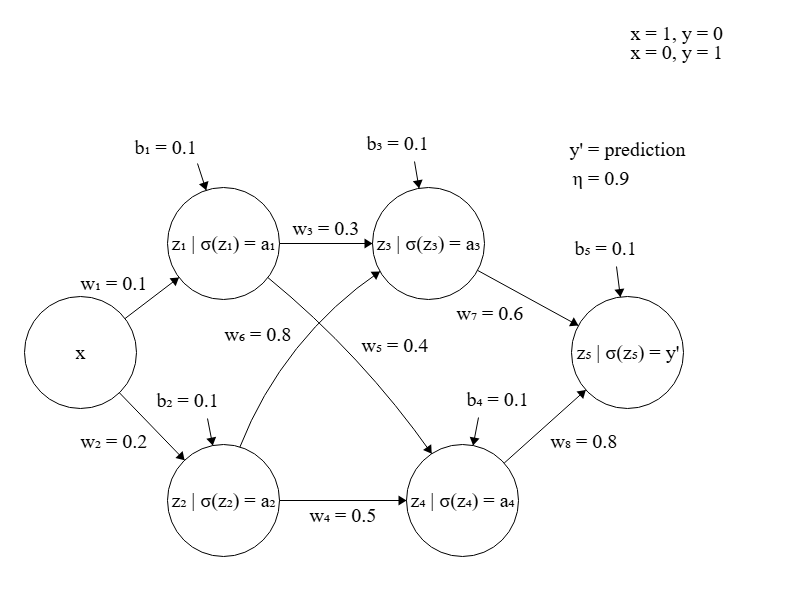



The sigmoid function is given by:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

First order derivative of this function is:
$$
\sigma'(x) = \sigma(x) \left( 1 - \sigma(x) \right)
$$


---


Now, consider the Loss Function below:
$$
\text{E}(y, \hat{y}) = \frac{1}{2} (\hat{y}_i - y_i)^2
$$



In [1]:
import numpy as np

In [3]:
import numpy as np

class MLP:
    def __init__(self):
        self.input_size = 1  # Number of input features (x)
        self.hidden_size1 = 2  # Number of neurons in the first hidden layer
        self.hidden_size2 = 2  # Number of neurons in the second hidden layer
        self.output_size = 1  # Number of output neurons (y)

        # Initialize weights and biases for each layer
        self.weights1 = np.array([[0.1, 0.2]])
        self.bias1 = np.array([[0.1 , 0.1]])

        self.weights2 = np.array([[0.3, 0.5], [0.8, 0.4]])
        self.bias2 = np.array([[0.1 , 0.1]])

        self.weights3 = np.array([[0.6], [0.8]])
        self.bias3 = np.array([[0.1]])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        # Forward pass through the network
        self.hidden_layer1_input = np.dot(x, self.weights1) + self.bias1
        self.hidden_layer1_output = self.sigmoid(self.hidden_layer1_input)

        self.hidden_layer2_input = np.dot(self.hidden_layer1_output, self.weights2) + self.bias2
        self.hidden_layer2_output = self.sigmoid(self.hidden_layer2_input)

        output_layer_input = np.dot(self.hidden_layer2_output, self.weights3) + self.bias3
        self.predicted_output = self.sigmoid(output_layer_input)

        return self.predicted_output

    def backward(self, x, y, learning_rate = 0.1):
        # Backward pass to compute gradients and update weights

        # Compute gradients for output layer
        error = self.predicted_output - y
        output_layer_gradient = error * (self.predicted_output * (1 - self.predicted_output))

        # Update weights and biases of output layer
        delta_weights3 = np.dot(self.hidden_layer2_output.T, output_layer_gradient)
        delta_bias3 = np.sum(output_layer_gradient, axis=0, keepdims=True)

        self.weights3 -= learning_rate * delta_weights3
        self.bias3 -= learning_rate * delta_bias3

        # Compute gradients for second hidden layer
        hidden_layer2_gradient = np.dot(output_layer_gradient, self.weights3.T) * \
                                 (self.hidden_layer2_output * (1 - self.hidden_layer2_output))

        # Update weights and biases of second hidden layer
        delta_weights2 = np.dot(self.hidden_layer1_output.T, hidden_layer2_gradient)
        delta_bias2 = np.sum(hidden_layer2_gradient, axis=0, keepdims=True)

        self.weights2 -= learning_rate * delta_weights2
        self.bias2 -= learning_rate * delta_bias2

        # Compute gradients for first hidden layer
        hidden_layer1_gradient = np.dot(hidden_layer2_gradient, self.weights2.T) * \
                                 (self.hidden_layer1_output * (1 - self.hidden_layer1_output))

        # Update weights and biases of first hidden layer
        delta_weights1 = np.dot(x.T, hidden_layer1_gradient)
        delta_bias1 = np.sum(hidden_layer1_gradient, axis=0, keepdims=True)

        self.weights1 -= learning_rate * delta_weights1
        self.bias1 -= learning_rate * delta_bias1

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs+1):
            for i in range(len(X)):
                x_input = X[i].reshape(1, -1)  # Reshape input for single sample
                target = y[i]

                # Forward pass
                output = self.forward(x_input)
                # Backward pass
                self.backward(x_input, target, learning_rate)

            if epoch % 500 == 0:
                loss = np.mean(np.square(y - self.predict(X)))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            x_input = X[i].reshape(1, -1)  # Reshape input for single sample
            output = self.forward(x_input)
            predictions.append(output[0, 0])  # Append the predicted output
        return np.array(predictions)


# Sample XOR-like dataset
X = np.array([[1], [0]])
y = np.array([0, 1])

# Initialize and train the MLP
mlp = MLP()
mlp.train(X, y, epochs=5000, learning_rate=0.9)

# Make predictions
predictions = mlp.predict(X)
print("Predictions:", predictions)


Epoch 0, Loss: 0.2944
Epoch 500, Loss: 0.1962
Epoch 1000, Loss: 0.0029
Epoch 1500, Loss: 0.0012
Epoch 2000, Loss: 0.0007
Epoch 2500, Loss: 0.0005
Epoch 3000, Loss: 0.0004
Epoch 3500, Loss: 0.0003
Epoch 4000, Loss: 0.0003
Epoch 4500, Loss: 0.0002
Epoch 5000, Loss: 0.0002
Predictions: [0.01649806 0.98744708]
